# Load data

In [1]:
import pandas as pd

# Read the data
undergrad = pd.read_csv('./data/undergrad_courses.csv')
all = pd.read_csv('./data/all_courses.csv')
undergrad.info()
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9472 entries, 0 to 9471
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        9472 non-null   object
 1   description  9471 non-null   object
dtypes: object(2)
memory usage: 148.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14211 entries, 0 to 14210
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        14211 non-null  object
 1   description  14210 non-null  object
dtypes: object(2)
memory usage: 222.2+ KB


# Drop rows with missing values

In [2]:
# drop rows with missing values
undergrad = undergrad.dropna()
all = all.dropna()
undergrad.info()
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9471 entries, 0 to 9471
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        9471 non-null   object
 1   description  9471 non-null   object
dtypes: object(2)
memory usage: 222.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14210 entries, 0 to 14210
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        14210 non-null  object
 1   description  14210 non-null  object
dtypes: object(2)
memory usage: 333.0+ KB


# Drop courses that has "No description." as description

In [3]:
# drop rows where the description is just "No description."
undergrad = undergrad[undergrad.description != "No description."]
all = all[all.description != "No description."]

undergrad.info()
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9468 entries, 0 to 9471
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        9468 non-null   object
 1   description  9468 non-null   object
dtypes: object(2)
memory usage: 221.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13824 entries, 0 to 14210
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        13824 non-null  object
 1   description  13824 non-null  object
dtypes: object(2)
memory usage: 324.0+ KB


# Visualize the distribution of input/output length

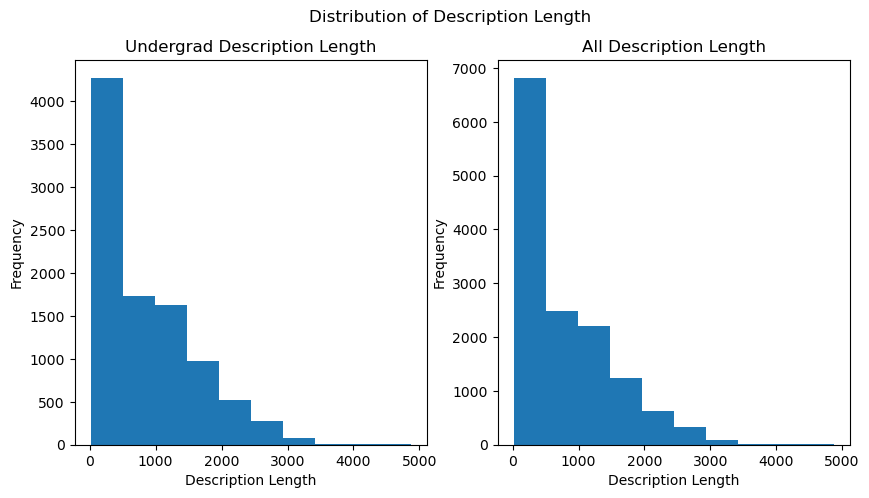

The 90th percentile value for description length is:
Undergrad:1922.300000000001
All:1818.0


In [9]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the histogram for the 'description' column in the undergrad DataFrame
ax1.hist(undergrad['description'].str.len())
ax1.set_title('Undergrad Description Length')

# Plot the histogram for the 'description' column in the all DataFrame
ax2.hist(all['description'].str.len())
ax2.set_title('All Description Length')

# Add x and y axis labels and a main title
fig.suptitle('Distribution of Description Length')
ax1.set_xlabel('Description Length')
ax1.set_ylabel('Frequency')
ax2.set_xlabel('Description Length')
ax2.set_ylabel('Frequency')

# Show the plot
plt.show()

# Get the 90th percentile value for the description length
percentile_90_1 = undergrad['description'].str.len().quantile(q=0.9)
percentile_90_2 = all['description'].str.len().quantile(q=0.9)


# Print the 90th percentile value
print(f"The 90th percentile value for description length is:\nUndergrad:{percentile_90_1}\nAll:{percentile_90_2}")

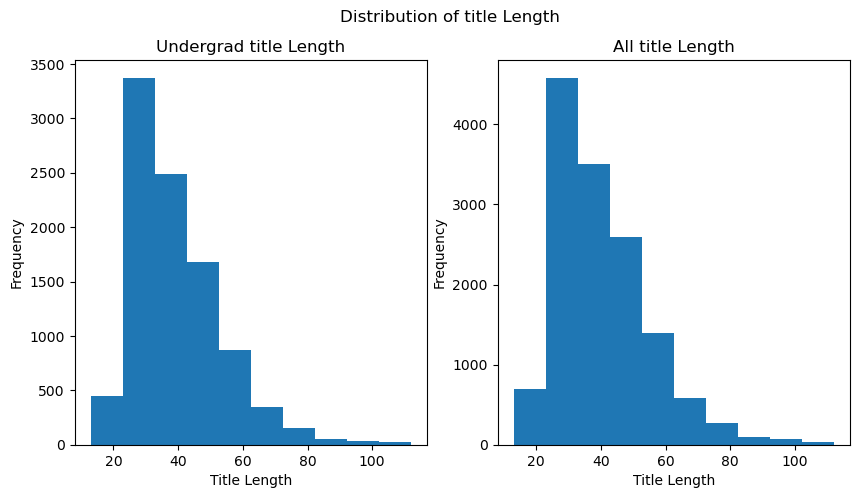

The maximum length of a title in the DataFrame is:
Undergrad:112
All:112


In [10]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the histogram for the 'description' column in the undergrad DataFrame
ax1.hist(undergrad['title'].str.len())
ax1.set_title('Undergrad title Length')

# Plot the histogram for the 'description' column in the all DataFrame
ax2.hist(all['title'].str.len())
ax2.set_title('All title Length')

# Add x and y axis labels and a main title
fig.suptitle('Distribution of title Length')
ax1.set_xlabel('Title Length')
ax1.set_ylabel('Frequency')
ax2.set_xlabel('Title Length')
ax2.set_ylabel('Frequency')

# Show the plot
plt.show()

# Calculate the length of each title in the DataFrame
title_lengths_1 = undergrad['title'].str.len()
title_lengths_2 = all['title'].str.len()

# Find the maximum length of a title
max_title_length_1 = title_lengths_1.max()
max_title_length_2 = title_lengths_2.max()

# Print the maximum title length
print(f"The maximum length of a title in the DataFrame is:\nUndergrad:{max_title_length_1}\nAll:{max_title_length_2}")


# 80/20 train test split
For example, 80% of CMPSC course will be training data, the rest will be test data. 

In [11]:
# sort dataframe by title
undergrad = undergrad.sort_values(by=['title'])
all = all.sort_values(by=['title'])

In [12]:
# Extract the first word of each title
first_word = undergrad['title'].str.split().str.get(0)

# Generate a Boolean mask for the selected rows (80%)
selected = first_word.sample(frac=0.8, random_state=42).index

# Split the DataFrame into two parts based on the selected rows
undergrad_train = undergrad.loc[selected]
undergrad_train = undergrad_train.sort_values('title')

undergrad_test = undergrad.drop(selected)


In [13]:
# Extract the first word of each title
first_word = all['title'].str.split().str.get(0)

# Generate a Boolean mask for the selected rows (80%)
selected = first_word.sample(frac=0.8, random_state=42).index

# Split the DataFrame into two parts based on the selected rows
all_train = all.loc[selected]
all_train = all_train.sort_values('title')

all_test = all.drop(selected)

# Output to csv

In [14]:
# output train and test dataframes to csv
undergrad_train.to_csv('./data/undergrad_train.csv', index=False)
undergrad_test.to_csv('./data/undergrad_test.csv', index=False)

all_train.to_csv('./data/all_train.csv', index=False)
all_test.to_csv('./data/all_test.csv', index=False)